# 📱 Mobile Phone Price Prediction
## Feature Extraction & Prediction Model

### **Objective**
Build a predictive model to estimate mobile phone prices based on specifications and identify the most influential features that drive pricing.  



In [53]:
# 1. Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


## **Step 1 – Data Loading & Exploration**
#We start by loading the dataset, checking its structure, identifying missing values, duplicates, and data ranges.


In [22]:
# Load dataset
df = pd.read_csv("Processed_Flipdata - Processed_Flipdata.csv")

# Price cleanup
df['Prize'] = df['Prize'].astype(str).str.replace(',', '').astype(float)

print("Dataset shape before cleaning:", df.shape)
df.head()


Dataset shape before cleaning: (541, 12)


,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299.0
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299.0
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999.0
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649.0
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999.0


In [24]:
# Summary info and missing values
df.info()
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.8+ KB

Missing Values:
 Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processo

## **Step 2 – Data Preprocessing**
- Remove duplicates  
- Fill missing values  
- Encode categorical variables



In [27]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == "object":
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

print("Dataset shape after cleaning:", df.shape)


Dataset shape after cleaning: (541, 12)


In [31]:
# Encode categorical columns
categorical_cols = ['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Feature variables and target
X = df_encoded.drop(columns=['Prize'])
y = df_encoded['Prize']


## **Step 3 – Train-Test Split**
We split the dataset into training (80%) and testing (20%) sets for model evaluation.


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## **Step 4 – Model Building**
We train two models:
- Random Forest Regressor
- Gradient Boosting Regressor (for comparison)


In [39]:
# RandomForest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest:\nMAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.3f}")


Random Forest:
MAE: 1926.93, RMSE: 4605.44, R²: 0.846


In [41]:
# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting:\nMAE: {mae_gb:.2f}, RMSE: {rmse_gb:.2f}, R²: {r2_gb:.3f}")


Gradient Boosting:
MAE: 2047.03, RMSE: 4950.94, R²: 0.822


## **Step 5 – Feature Importance Analysis**
We identify the top 10 features affecting price using the trained Random Forest model.


Memory                         0.259526
Battery_                       0.119100
RAM                            0.110248
Front Camera_12MP              0.086885
Unnamed: 0                     0.084263
Mobile Height                  0.082610
Model_APPLE iPhone 14 Plus     0.049249
Model_Google Pixel 7           0.017857
Processor__Google Tensor G2    0.012165
Rear Camera_12MP               0.011240
dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23748\3473131341.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


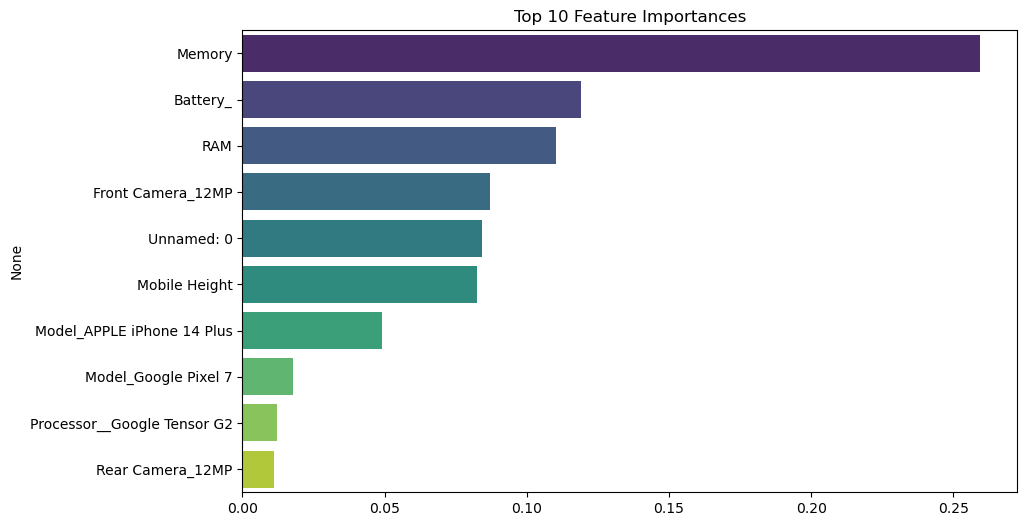

In [44]:
# Feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features = importances.head(10)
print(top_features)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title("Top 10 Feature Importances")
plt.show()


## **Step 6 – Data Visualisations**
### Price Distribution, Correlation Heatmap, RAM vs Price, Battery vs Price


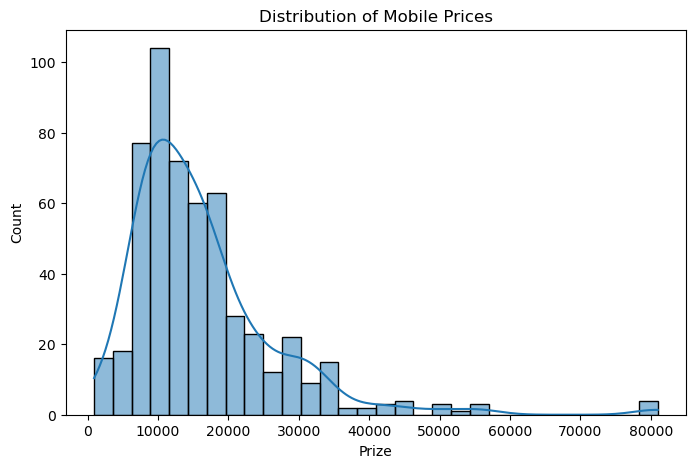

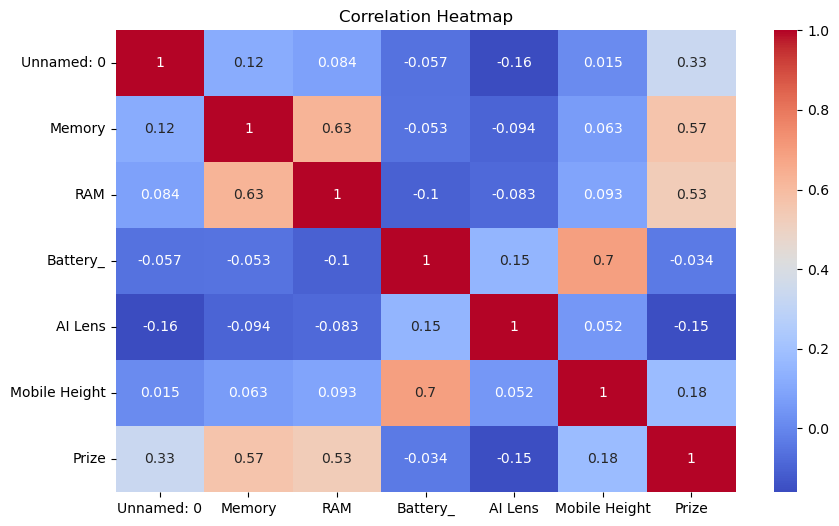

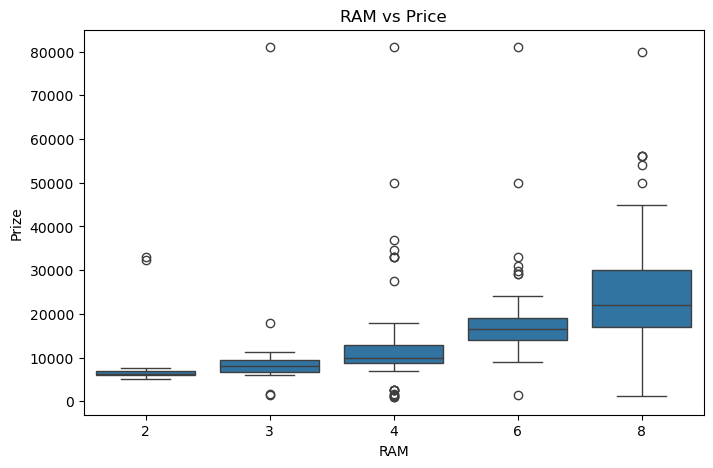

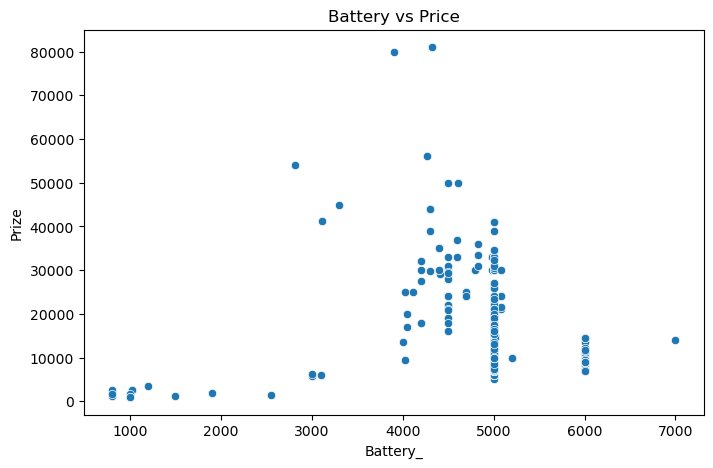

In [47]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Prize'], bins=30, kde=True)
plt.title("Distribution of Mobile Prices")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# RAM vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='RAM', y='Prize', data=df)
plt.title("RAM vs Price")
plt.show()

# Battery vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='Battery_', y='Prize', data=df)
plt.title("Battery vs Price")
plt.show()


## **Step 7 – Save Model**
We save the Random Forest model for reuse without retraining.


In [50]:
joblib.dump(rf, "mobile_price_predictor.pkl")
print("✅ Model saved as mobile_price_predictor.pkl")


✅ Model saved as mobile_price_predictor.pkl


## **Step 8 – Recommendations**
- Increase **Memory (Storage)** and **RAM** for premium pricing.
- Use **flagship processors** in high-end segment models.
- Market **high-MP cameras (108MP/200MP)**.
- Emphasise **battery capacity** in budget/mid-range phones.
- Combine these upgrades for optimal price positioning.
